# Question 2: Linear Dimensionality Reduction

In [1]:
#Import the Libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
#Import the Dataset B
import csv 
data_B = pd.read_csv("DataB.csv", sep=',')

In [3]:
print(data_B.shape)
data_B.describe()
data_B.head()


(2066, 786)


,Unnamed: 0,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,...,fea.776,fea.777,fea.778,fea.779,fea.780,fea.781,fea.782,fea.783,fea.784,gnd
0,1,4,4,3,0,0,4,2,1,4,...,1,3,0,4,2,1,1,4,5,0
1,2,5,1,4,3,1,3,5,1,4,...,1,1,3,3,1,3,3,5,4,0
2,3,1,3,0,3,1,1,0,1,0,...,3,0,2,4,2,2,1,2,4,0
3,4,5,3,2,3,5,2,2,0,4,...,5,4,5,1,4,4,2,4,4,0
4,5,3,5,3,3,0,4,1,1,4,...,1,3,3,3,1,2,4,1,1,0


# 2.2 Principal Component Analysis (PCA)

# 2.2.1 Practical Questions

## 1. In PCA, compute the eigenvectors and eigenvalues. Plot the scree plot and visually discuss which cut-oﬀ is good.

In [4]:
#Normalize data
from sklearn import preprocessing


x_data = data_B.iloc[:,1:785]
col_Q2=x_data.columns.values.tolist()
scaled= preprocessing.StandardScaler().fit(x_data[col_Q2])
x_scale = scaled.transform(x_data[col_Q2])

x_train= pd.DataFrame(x_scale,columns=col_Q2)

x_train

,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,...,fea.775,fea.776,fea.777,fea.778,fea.779,fea.780,fea.781,fea.782,fea.783,fea.784
0,1.010077,0.966782,0.359594,-1.668004,-1.638671,1.007994,-0.324102,-0.992537,0.983784,-0.981814,...,-1.003413,-0.987770,0.314967,-1.650964,1.025781,-0.332975,-1.009889,-1.034285,1.047333,1.649643
1,1.687176,-1.029924,1.026488,0.336317,-0.976018,0.340307,1.674690,-0.992537,0.983784,1.005542,...,0.318686,-0.987770,-1.004957,0.340991,0.364131,-1.001515,0.313988,0.307104,1.702034,0.984636
2,-1.021220,0.301213,-1.641090,0.336317,-0.976018,-0.995067,-1.656630,-0.992537,-1.679168,-0.319362,...,0.979735,0.356586,-1.664918,-0.322994,1.025781,-0.332975,-0.347950,-1.034285,-0.262071,0.984636
3,1.687176,0.301213,-0.307301,0.336317,1.674594,-0.327380,-0.324102,-1.648724,0.983784,1.667994,...,0.979735,1.700943,0.974929,1.668962,-0.959168,1.004104,0.975927,-0.363590,1.047333,0.984636
4,0.332978,1.632350,0.359594,0.336317,-1.638671,1.007994,-0.990366,-0.992537,0.983784,0.343090,...,-1.003413,-0.987770,0.314967,0.340991,0.364131,-1.001515,-0.347950,0.977798,-0.916772,-1.010386
5,-1.698319,-1.695492,-0.974195,1.672532,-1.638671,1.675681,-0.324102,0.976022,0.318046,-0.319362,...,-0.342363,1.028765,0.974929,1.668962,1.025781,-1.001515,-1.009889,-1.034285,-0.916772,-1.010386
6,-1.021220,0.301213,0.359594,1.672532,0.349288,-0.327380,1.008426,0.976022,-0.347692,-0.981814,...,-0.342363,-0.315592,-0.344995,-0.322994,0.364131,1.672643,-0.347950,0.977798,-1.571474,-1.010386
7,0.332978,0.301213,-1.641090,1.672532,-0.313365,-0.995067,-0.324102,1.632208,0.318046,-1.644266,...,-1.664462,-0.315592,-1.004957,0.340991,-0.297518,-0.332975,0.975927,-0.363590,-0.916772,1.649643
8,1.687176,-1.695492,0.359594,0.336317,-0.976018,0.340307,-1.656630,-1.648724,-0.347692,0.343090,...,-1.003413,1.028765,0.314967,-1.650964,-0.959168,-0.332975,0.313988,1.648493,-0.916772,-0.345379
9,1.687176,1.632350,1.026488,1.672532,0.349288,-0.995067,-1.656630,-1.648724,0.983784,-0.981814,...,0.979735,0.356586,-1.004957,1.004977,-0.297518,-1.670054,0.313988,-1.034285,1.047333,-1.010386


In [5]:
y_train = data_B.iloc[:,-1].values
y_train.shape

(2066,)

Each ﬁle has 785 columns: 784 inputs (consisting of the optical image representing the handwritten character) and 1 response (which digit the hand-written character represents). Split both testing and training data into input matrix X (x_train) and response vector y (y_train) . We’ll only use the training data - we’re not actually training any models here, just reducing dimensionality of the problem.

In [6]:
#PCA
from sklearn.decomposition import PCA
pca_2 = PCA() 
pca_2.fit(x_train)
eigv_pca = pd.DataFrame(pca_2.components_)
eigv_pca

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.001979,0.001513,-0.000492,-0.003617,-0.000810,0.005896,-0.001439,-0.001285,-0.004915,-0.002636,...,-0.002642,-0.000678,0.001724,-0.001867,0.006185,0.002179,-0.003063,-0.000112,-0.001323,0.005912
1,-0.004933,0.006404,0.001566,-0.000518,0.002937,0.003685,0.008790,-0.000596,0.000131,0.004207,...,0.004506,0.001961,-0.004526,-0.003306,0.007419,0.004995,0.005274,-0.003005,-0.009471,-0.002876
2,-0.000375,0.002587,-0.003725,0.000352,-0.001220,-0.000092,-0.002634,0.005623,-0.000141,-0.000913,...,-0.000357,0.004578,0.003625,0.006495,0.004720,0.002290,0.010619,-0.003359,0.005531,0.006242
3,0.006154,0.002790,-0.003226,-0.002489,0.010679,0.000604,-0.001788,-0.003557,-0.000985,0.000627,...,0.012484,-0.006529,0.003851,-0.008501,-0.003250,-0.005949,-0.001025,0.003811,-0.001099,0.003276
4,-0.003251,0.003767,0.001384,-0.000363,-0.001331,0.008793,0.002887,0.007900,-0.000897,-0.004340,...,0.001125,-0.004288,0.004768,-0.000073,0.006416,0.002894,0.003249,0.001388,-0.002603,-0.000526
5,-0.000960,0.006504,-0.000870,0.001144,0.000195,-0.004870,-0.004164,0.009354,-0.001381,0.001964,...,-0.000352,0.003095,-0.005537,0.013494,-0.008918,0.002816,-0.011922,-0.010780,0.005770,0.008562
6,0.001503,-0.001290,0.000803,-0.000155,-0.005012,-0.002873,-0.001948,0.001380,-0.003325,-0.007353,...,-0.012545,0.002506,0.001819,0.008611,0.007282,-0.008366,0.019401,-0.002547,0.003260,-0.008249
7,-0.006965,-0.005434,-0.014469,0.003804,-0.011552,0.004078,0.000823,-0.012160,-0.001927,-0.001559,...,0.013669,-0.011988,-0.008081,-0.002159,-0.003408,-0.002071,0.000745,-0.011330,-0.002191,-0.000808
8,-0.004203,-0.004323,-0.009797,0.006343,-0.001666,0.007291,0.003148,-0.010231,-0.001950,0.008797,...,0.009273,0.004082,-0.002380,0.016208,-0.006117,0.008342,0.002478,-0.007723,-0.008380,0.001154
9,-0.015487,0.000049,0.008496,0.016082,0.000853,0.001902,-0.008062,0.007266,0.001965,0.003953,...,-0.009229,-0.003291,0.003988,0.006168,0.008851,-0.006463,-0.008394,0.003539,-0.009665,-0.001172


In [7]:
eigenvalues_pca = pd.DataFrame(pca_2.singular_values_*pca_2.singular_values_/2065)
eigenvalues_pca

,0
0,51.777319
1,28.800865
2,26.770911
3,23.930346
4,21.575039
5,15.893525
6,13.861941
7,11.912089
8,10.661418
9,9.823583


In [8]:
variance_pca = pca_2.explained_variance_ratio_
pd.DataFrame(variance_pca)

,0
0,0.066011
1,0.036718
2,0.034130
3,0.030509
4,0.027506
5,0.020263
6,0.017672
7,0.015187
8,0.013592
9,0.012524


In [9]:
#PCA
covar_matrix = PCA(n_components = 784) #we have 784 features
covar_matrix.fit(x_train)
var=np.cumsum(covar_matrix.explained_variance_ratio_)
var #cumulative sum of variance explained with [n] features

array([0.06601053, 0.10272855, 0.13685859, 0.16736722, 0.19487308,
       0.21513562, 0.23280811, 0.24799475, 0.26158691, 0.27411093,
       0.28572945, 0.29629571, 0.30581944, 0.31498192, 0.32392939,
       0.33250845, 0.34037672, 0.34806478, 0.35567868, 0.36300407,
       0.37010066, 0.37690967, 0.38367935, 0.39014617, 0.39639595,
       0.40243936, 0.40812591, 0.41378485, 0.4193628 , 0.42478098,
       0.43013217, 0.43539991, 0.44050801, 0.44547958, 0.45035099,
       0.45514206, 0.45986028, 0.46441474, 0.46892621, 0.47335786,
       0.47766521, 0.48184321, 0.48591796, 0.48998184, 0.49393378,
       0.49776669, 0.50153614, 0.50527939, 0.5089086 , 0.51248455,
       0.5160256 , 0.51951327, 0.52299452, 0.52636067, 0.52967847,
       0.53294929, 0.53611469, 0.53925789, 0.5423669 , 0.54543998,
       0.54848191, 0.55147069, 0.55441691, 0.55729647, 0.5601395 ,
       0.56294294, 0.56568886, 0.56842444, 0.57109309, 0.57372344,
       0.57634022, 0.57889747, 0.5814085 , 0.58390295, 0.58635

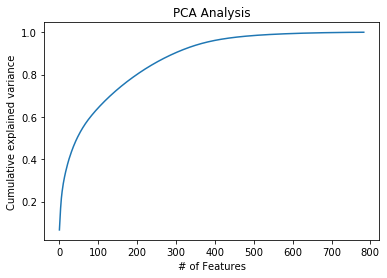

In [10]:
plt.ylabel('Cumulative explained variance')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.style.context('seaborn-whitegrid')
plt.plot(var)

##  Visually discuss which cut-oﬀ is good.
Thiscurvequantiﬁeshowmuchofthetotal,784-dimensionalvarianceiscontainedwithinthe ﬁrst N components. We can see that with the digits the ﬁrst 100 components contain approximately 90% of the variance, while you need around 200 components to describe close to 100% of the variance. For data compression purpose, we generally go for 99% variance retention, while for visualization cut-oﬀ around 200 is good.

## 2. Using subplot in python matplotlib, plot the scatter plot of the projected data with the top 20 eigenvalues (although PCA does not use labels but use colors and legend to show the class instances).

In [11]:
import seaborn as sns
from sklearn.decomposition import PCA 


model_20 = PCA(n_components=20)
model_20.fit(x_train)
pca_20 = model_20.transform(x_train) 
print(pca_20)
print(pca_20.shape)


[[ 9.97069222e+00 -6.18172223e+00 -4.99286314e+00 ...  1.59258418e-01
  -1.20768781e+00  1.19572931e+00]
 [ 1.14159998e+01 -6.94158728e+00 -5.06302856e+00 ... -1.03789159e+00
  -7.70268360e-01  6.10980197e-03]
 [ 3.69011917e+00 -4.69309688e+00 -2.90865702e+00 ... -2.75605680e+00
   5.94034228e-01  4.86272974e+00]
 ...
 [-3.49421526e-01 -9.33681124e-01  8.10744157e+00 ...  1.12945176e+00
  -1.12540859e+00 -1.01276604e+00]
 [-3.11526327e+00 -2.09047422e+00  6.27251926e+00 ...  1.28605893e+00
   2.65115756e-02 -1.57664820e+00]
 [-5.64409375e+00  2.46166736e-01  4.14018281e+00 ... -2.72165360e+00
   1.05076233e+00  3.19692960e+00]]
(2066, 20)


In [12]:
pca_20

array([[ 9.97069222e+00, -6.18172223e+00, -4.99286314e+00, ...,
         1.59258418e-01, -1.20768781e+00,  1.19572931e+00],
       [ 1.14159998e+01, -6.94158728e+00, -5.06302856e+00, ...,
        -1.03789159e+00, -7.70268360e-01,  6.10980197e-03],
       [ 3.69011917e+00, -4.69309688e+00, -2.90865702e+00, ...,
        -2.75605680e+00,  5.94034228e-01,  4.86272974e+00],
       ...,
       [-3.49421526e-01, -9.33681124e-01,  8.10744157e+00, ...,
         1.12945176e+00, -1.12540859e+00, -1.01276604e+00],
       [-3.11526327e+00, -2.09047422e+00,  6.27251926e+00, ...,
         1.28605893e+00,  2.65115756e-02, -1.57664820e+00],
       [-5.64409375e+00,  2.46166736e-01,  4.14018281e+00, ...,
        -2.72165360e+00,  1.05076233e+00,  3.19692960e+00]])

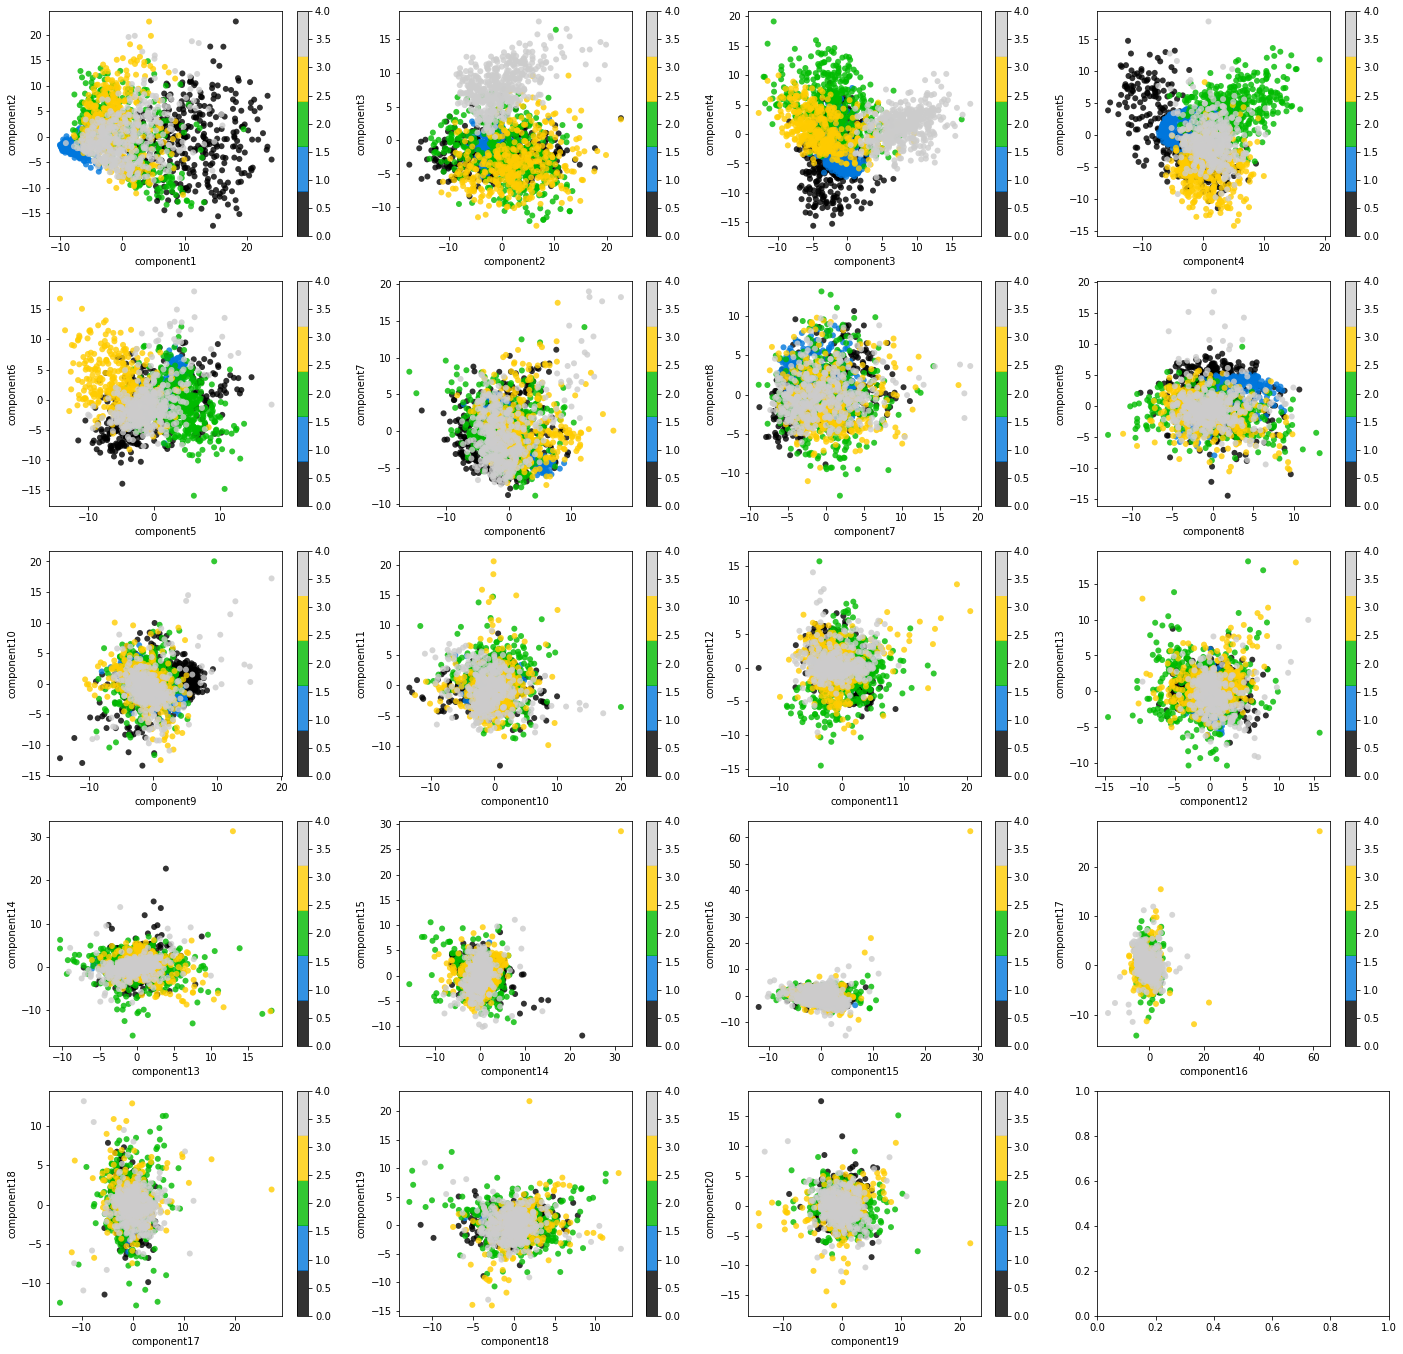

In [13]:
#Dataframe transform

df=pd.DataFrame(pca_20[:,0:20],columns=pd.RangeIndex(start=1, stop=21, step=1))
df['number']=np.ravel(data_B['gnd'])

import matplotlib.pyplot as plt
import numpy as np

figure, axes = plt.subplots(5, 4,figsize=(24,24))
for k in range(1, 20):
    plt.subplot(5, 4, k)
    plt.scatter(pca_20[:, k-1],pca_20[:, k],c=np.squeeze(y_train), edgecolor='none', alpha=0.8,cmap=plt.cm.get_cmap('nipy_spectral',5))
    strx=str(k)
    stry=str(k+1)
    plt.xlabel('component'+strx)
    plt.ylabel('component'+stry)
    plt.colorbar()

## 3. Plot two 2-dimensional representations of the data points based on the ﬁrst vs second principal components displaying the data points of each class with a diﬀerent color.

(2066, 2)


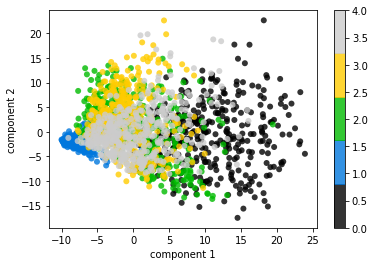

In [14]:
model = PCA(n_components=2)
model.fit(x_train)
X_2D = model.transform(x_train)
print(X_2D.shape)
plt.scatter(X_2D[:, 0], X_2D[:, 1], c=np.squeeze(y_train), edgecolor='none', alpha=0.8, cmap=plt.cm.get_cmap('nipy_spectral',5))
plt.xlabel('component 1') 
plt.ylabel('component 2') 
plt.colorbar()


To gain some intuition into the relationships between these points, we can use PCA to project them to a more manageable number of dimensions - in 2 dimensions.We see that in the two-dimensional representation, the same handwritten value of the data point gather. However, they are overlapping and not fairly well separated.

## 3. Plot two 2-dimensional representations of the data points based on the 5th vs 6th principal components displaying the data points of each class with a diﬀerent color.


(2066, 6)


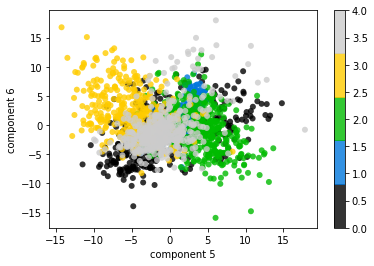

In [15]:
model2 = PCA(n_components=6)
model2.fit(x_train)
X_2D = model2.transform(x_train)
print(X_2D.shape)
plt.scatter(X_2D[:, 4], X_2D[:, 5], c=np.squeeze(y_train), edgecolor='none', alpha=0.8, cmap=plt.cm.get_cmap('nipy_spectral',5))
plt.xlabel('component 5') 
plt.ylabel('component 6') 
plt.colorbar()

Similar as the the step of ﬁrst vs second principal components, and even more mess than it. We see that in the two-dimensional representation, the same handwritten value of the data point gather. However, they are overlapping and not fairly separated.

# 4. Implement (1) PCA and (2) dual PCA with singular value decomposition. [Note: No libraries for PCA, dual PCA or SVD should be used for this question. In PCA and dual PCA, only left and right matrices of singular vector are used. So, use the relationship of SVD and eigenvalue decomposition to ﬁnd the left and right singular vectors and the singular values. And then, use them in PCA and dual PCA.] Save the time of computations and compare the times. Analyze your comparison.


In [16]:
import time
from numpy import linalg as la
U1, s1, V1 = la.svd(x_train)
print(U1)
print(U1.shape)
print(s1)
print(s1.shape)
print(V1)
print(V1.shape)

[[ 0.03049267 -0.02534817  0.02123528 ... -0.00318707 -0.04082189
  -0.01126899]
 [ 0.03491276 -0.028464    0.02153371 ...  0.01548954 -0.00085919
   0.01186281]
 [ 0.01128523 -0.01924406  0.01237089 ... -0.01708609  0.01053288
  -0.03616937]
 ...
 [-0.00106861 -0.00382856 -0.03448198 ...  0.71398347  0.0080889
   0.00575192]
 [-0.00952719 -0.008572   -0.02667782 ...  0.01084765  0.64082146
   0.03738606]
 [-0.01726094  0.00100941 -0.01760873 ...  0.0169409   0.03061641
   0.72716903]]
(2066, 2066)
[326.98648993 243.87247788 235.12109703 222.29746927 211.07452792
 181.1632671  169.18897349 156.83897246 148.37731915 142.42787149
 137.1825035  130.82291136 124.20147308 121.82306627 120.38529302
 117.88078102 112.89193333 111.59158993 111.05209867 108.92774083
 107.2131376  105.0184084  104.71458733 102.34548435 100.61333371
  98.93824632  95.97262995  95.73941705  95.05182483  93.68070417
  93.09968515  92.3709813   90.96044113  89.736674    88.82816206
  88.0926025   87.42025582  85.889

## Algorithm of PCA and dual PCA

I implemented the PCA and dual PCA by the following basic algorthm.

Note that in the SVD factorization $X = UΣV^{⊤}$, the eigenvectors in U corresponding tononzero singular values in $Σ$ (square roots of eigenvalues) are in a one-to-one correspondence with the eigenvectors in $V$. Now assume that we perform dimensionality reduction on $U$ and keep only the first $d$ eigenvectors, corresponding to the top $d$ nonzero singular values in $Σ$. These eigenvectors will still be in a one-to-one correspondence with the first d eigenvectors in $V$. (In the piazza, the prof said we didn't need to sort them and get top 20 to see the times.)

Recover basis: Calculate $𝐗^{⊤}𝐗$ and let V = eigenvectors of  $𝐗^{⊤}𝐗$  corresponding to the top d eigenvalues. Let Σ = diagonal matrix of square roots of the top d eigenvalues.Let Σ = diagonal matrix of square roots of the top d eigenvalues.

Encode training data: $Y$ =$U^{⊤}X$= $ΣV$ where Y is a $d × t$ matrix of encodings of the original data.

Reconstruct training data: $Xˆ$ = $UY$ = $UΣV^{⊤}$ = $XV Σ^{-1}ΣV$= $XVV^{⊤}$ 

In [17]:
#PCA

def SVD(A):
    AtA = np.dot(A.T, A)
    AAt = np.dot(A, A.T)
 
    AtAe, AtAv = la.eig(AtA)
    AAte, AAtv = la.eig(AAt)
    
    diag = np.diag(np.sqrt(AtAe))
    return AAtv,diag, AtAv.T


U, s, Vt = SVD(x_train)#the results are the same with la.svd(x_train) above

print(U.shape)
print(U)
print(s.shape)
print(s)
print(Vt.shape)
print(Vt)

(2066, 2066)
[[ 3.04926733e-02+0.j         -2.53481740e-02+0.j
   2.12352839e-02+0.j         ...  6.92553808e-04-0.00024377j
   6.92553808e-04+0.00024377j -1.68411533e-03+0.j        ]
 [ 3.49127567e-02+0.j         -2.84640034e-02+0.j
   2.15337072e-02+0.j         ... -7.34681996e-05-0.00017224j
  -7.34681996e-05+0.00017224j -3.37312537e-05+0.j        ]
 [ 1.12852344e-02+0.j         -1.92440628e-02+0.j
   1.23708865e-02+0.j         ... -1.06732481e-04+0.00016232j
  -1.06732481e-04-0.00016232j  2.30718645e-04+0.j        ]
 ...
 [-1.06861152e-03+0.j         -3.82856263e-03+0.j
  -3.44819839e-02+0.j         ... -7.32966297e-03-0.00053263j
  -7.32966297e-03+0.00053263j -1.05540502e-03+0.j        ]
 [-9.52719260e-03+0.j         -8.57199741e-03+0.j
  -2.66778234e-02+0.j         ... -3.96464701e-02+0.00170606j
  -3.96464701e-02-0.00170606j  1.25097103e-02+0.j        ]
 [-1.72609387e-02+0.j          1.00940719e-03+0.j
  -1.76087268e-02+0.j         ...  5.78352508e-03-0.00142455j
   5.78352508e-

In [18]:
U=U[:,0:784]
pd.DataFrame(np.real(U[:,0:784]))

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.030493,-0.025348,0.021235,0.019770,-0.013161,0.015703,0.007543,0.009334,-0.046328,0.002669,...,0.013371,-0.003833,-0.000301,-0.012905,-0.016501,-0.005038,-0.021239,-0.008065,-0.002991,0.000596
1,0.034913,-0.028464,0.021534,0.019083,-0.008741,0.000808,0.009950,0.018968,-0.041845,0.010203,...,0.015207,0.010187,-0.028832,-0.015190,-0.011145,-0.028726,0.014017,0.035142,-0.000086,0.003509
2,0.011285,-0.019244,0.012371,-0.017702,-0.032272,0.017808,0.021650,0.034482,-0.022946,-0.021181,...,-0.017424,0.007513,0.005539,0.033180,0.027678,-0.006318,-0.022838,-0.024840,-0.044156,0.023695
3,0.022363,-0.024779,0.015515,-0.015776,-0.021615,0.030491,0.023475,0.031190,-0.045816,-0.010663,...,-0.039271,-0.007333,0.043992,0.027095,0.029533,-0.032866,-0.008093,0.063062,-0.012387,-0.006577
4,0.055236,-0.007637,0.017178,0.026413,-0.034690,-0.024525,-0.012921,0.018218,-0.017221,0.010243,...,0.004815,0.024586,0.049301,0.012063,0.002528,-0.005759,-0.005469,-0.020445,-0.041651,0.021913
5,0.046916,0.032482,0.004994,0.033458,0.004860,0.023089,-0.017088,0.030813,-0.017574,0.018265,...,0.022541,-0.006877,-0.016887,0.023730,-0.031264,-0.035274,0.012040,-0.027372,-0.020514,0.010224
6,0.040937,-0.021805,0.024493,0.011377,-0.039286,-0.017664,0.012725,0.053083,-0.011986,0.013722,...,-0.007785,0.000950,-0.043619,-0.030926,-0.003739,-0.001413,-0.017427,0.038789,-0.013650,0.004011
7,0.021700,0.042834,0.007139,0.031623,0.054772,-0.022525,-0.019389,-0.012624,0.033194,0.004915,...,0.023829,-0.032326,0.038866,0.013831,0.008508,0.014145,0.011223,0.023417,0.003527,0.043773
8,0.025205,0.007392,0.012666,-0.010811,-0.054381,0.037215,0.002759,0.031863,-0.033115,-0.011381,...,0.006828,-0.012488,-0.001042,-0.008203,-0.029114,-0.009527,-0.024065,-0.044299,0.008035,-0.019784
9,0.018523,-0.011815,0.021057,-0.000037,-0.042146,0.007429,0.009922,0.023248,-0.042988,-0.001113,...,0.021375,0.032158,-0.031978,-0.020821,0.052320,0.002803,0.010974,0.016462,-0.001739,0.068339


In [19]:
pd.DataFrame(s)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,326.98649,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
1,0.00000,243.872478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
2,0.00000,0.000000,235.121097,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
3,0.00000,0.000000,0.000000,222.297469,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
4,0.00000,0.000000,0.000000,0.000000,211.074528,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
5,0.00000,0.000000,0.000000,0.000000,0.000000,181.163267,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
6,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,169.188973,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
7,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,156.838972,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
8,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,148.377319,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
9,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,142.427871,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000


In [20]:
pd.DataFrame(Vt)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,-0.001979,-0.001513,0.000492,0.003617,0.000810,-0.005896,0.001439,0.001285,0.004915,0.002636,...,0.002642,0.000678,-0.001724,0.001867,-0.006185,-0.002179,0.003063,0.000112,0.001323,-0.005912
1,0.004933,-0.006404,-0.001566,0.000518,-0.002937,-0.003685,-0.008790,0.000596,-0.000131,-0.004207,...,-0.004506,-0.001961,0.004526,0.003306,-0.007419,-0.004995,-0.005274,0.003005,0.009471,0.002876
2,-0.000375,0.002587,-0.003725,0.000352,-0.001220,-0.000092,-0.002634,0.005623,-0.000141,-0.000913,...,-0.000357,0.004578,0.003625,0.006495,0.004720,0.002290,0.010619,-0.003359,0.005531,0.006242
3,-0.006154,-0.002790,0.003226,0.002489,-0.010679,-0.000604,0.001788,0.003557,0.000985,-0.000627,...,-0.012484,0.006529,-0.003851,0.008501,0.003250,0.005949,0.001025,-0.003811,0.001099,-0.003276
4,0.003251,-0.003767,-0.001384,0.000363,0.001331,-0.008793,-0.002887,-0.007900,0.000897,0.004340,...,-0.001125,0.004288,-0.004768,0.000073,-0.006416,-0.002894,-0.003249,-0.001388,0.002603,0.000526
5,-0.000960,0.006504,-0.000870,0.001144,0.000195,-0.004870,-0.004164,0.009354,-0.001381,0.001964,...,-0.000352,0.003095,-0.005537,0.013494,-0.008918,0.002816,-0.011922,-0.010780,0.005770,0.008562
6,0.001503,-0.001290,0.000803,-0.000155,-0.005012,-0.002873,-0.001948,0.001380,-0.003325,-0.007353,...,-0.012545,0.002506,0.001819,0.008611,0.007282,-0.008366,0.019401,-0.002547,0.003260,-0.008249
7,-0.006965,-0.005434,-0.014469,0.003804,-0.011552,0.004078,0.000823,-0.012160,-0.001927,-0.001559,...,0.013669,-0.011988,-0.008081,-0.002159,-0.003408,-0.002071,0.000745,-0.011330,-0.002191,-0.000808
8,-0.004203,-0.004323,-0.009797,0.006343,-0.001666,0.007291,0.003148,-0.010231,-0.001950,0.008797,...,0.009273,0.004082,-0.002380,0.016208,-0.006117,0.008342,0.002478,-0.007723,-0.008380,0.001154
9,0.015487,-0.000049,-0.008496,-0.016082,-0.000853,-0.001902,0.008062,-0.007266,-0.001965,-0.003953,...,0.009229,0.003291,-0.003988,-0.006168,-0.008851,0.006463,0.008394,-0.003539,0.009665,0.001172


In [61]:
start = time.process_time()
#Encode training data
Y=np.dot(U.T,x_train)

#Reconstruct training data
Reconstruction=np.dot(U, Y)
pca_time=time.process_time()-start

pca_time

3.375

In [59]:
#Dual PCA

start_d = time.process_time()
#Encode training data
Y_d=np.dot(s,Vt.T)
#Reconstruct training data
US=np.dot(U,s)
Reconstruction_d=np.dot(US,Vt.T)
dualpca_time=time.process_time()-start_d

dualpca_time

4.953125

## Save the time of computations and compare the times. Analyze your comparison.

According to the time of computations above, dual PCA takes longer. It turns out that the singular value decomposition also allows us to formulate the principle components algorithm entirely in terms of dot products between data points and limit the direct dependence on the original dimensionality n. 


# 2.3 Fisher Discriminant Analysis (FDA)
As discussed in the class, Fisher Discriminant Analysis (FDA) and Linear Discriminant Analysis (LDA) are equivalent.
## 2.3.1 Practical Questions
1. As the class labels are already known, you can use the FDA or LDA to reduce the dimensionality. Using any implementation of FDA or LDA you wish, and subplot in python matplotlib, plot the scatter plot of the projected data with the top 20 eigenvalues (use colors and legends for classes).

In [42]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda_2 = LDA()
lda_2.fit(x_train,y_train)

eigv_lda = pd.DataFrame(lda_2.scalings_)
eigv_lda

,0,1,2,3
0,-0.020195,0.054694,-0.095084,-0.011650
1,0.032310,0.046139,0.006066,-0.005919
2,0.052983,0.014679,0.045001,0.020549
3,-0.004092,0.012460,-0.044482,-0.034955
4,-0.042145,-0.069862,-0.017600,-0.022441
5,0.020529,0.002260,0.047576,-0.020910
6,0.032455,0.019943,-0.018491,-0.031834
7,0.018469,-0.000883,-0.056280,0.003185
8,0.052746,-0.010628,-0.041910,-0.010522
9,0.005601,-0.010129,-0.052639,-0.033722


In [43]:
eigva_lda = lda_2.explained_variance_ratio_
pd.DataFrame(eigva_lda)

,0
0,0.408880
1,0.253879
2,0.188592
3,0.148649


In [44]:
lda_4c=lda_2.transform(x_train)
pd.DataFrame(lda_4c)

,0,1,2,3
0,-5.277233,-2.052912,3.473823,-1.613518
1,-5.913727,-1.953482,3.665304,0.189606
2,-4.154543,-0.868888,1.172538,0.746605
3,-6.728769,-2.568941,4.442847,-0.640440
4,-6.977105,-2.125944,2.281978,-0.505802
5,-7.043006,-2.433204,4.533304,-0.125284
6,-7.529504,-1.667304,2.556248,-2.807865
7,-6.380275,-1.538234,2.431275,1.214161
8,-6.530964,-2.494244,1.279391,0.808482
9,-5.257274,-2.921786,3.759836,-2.723254


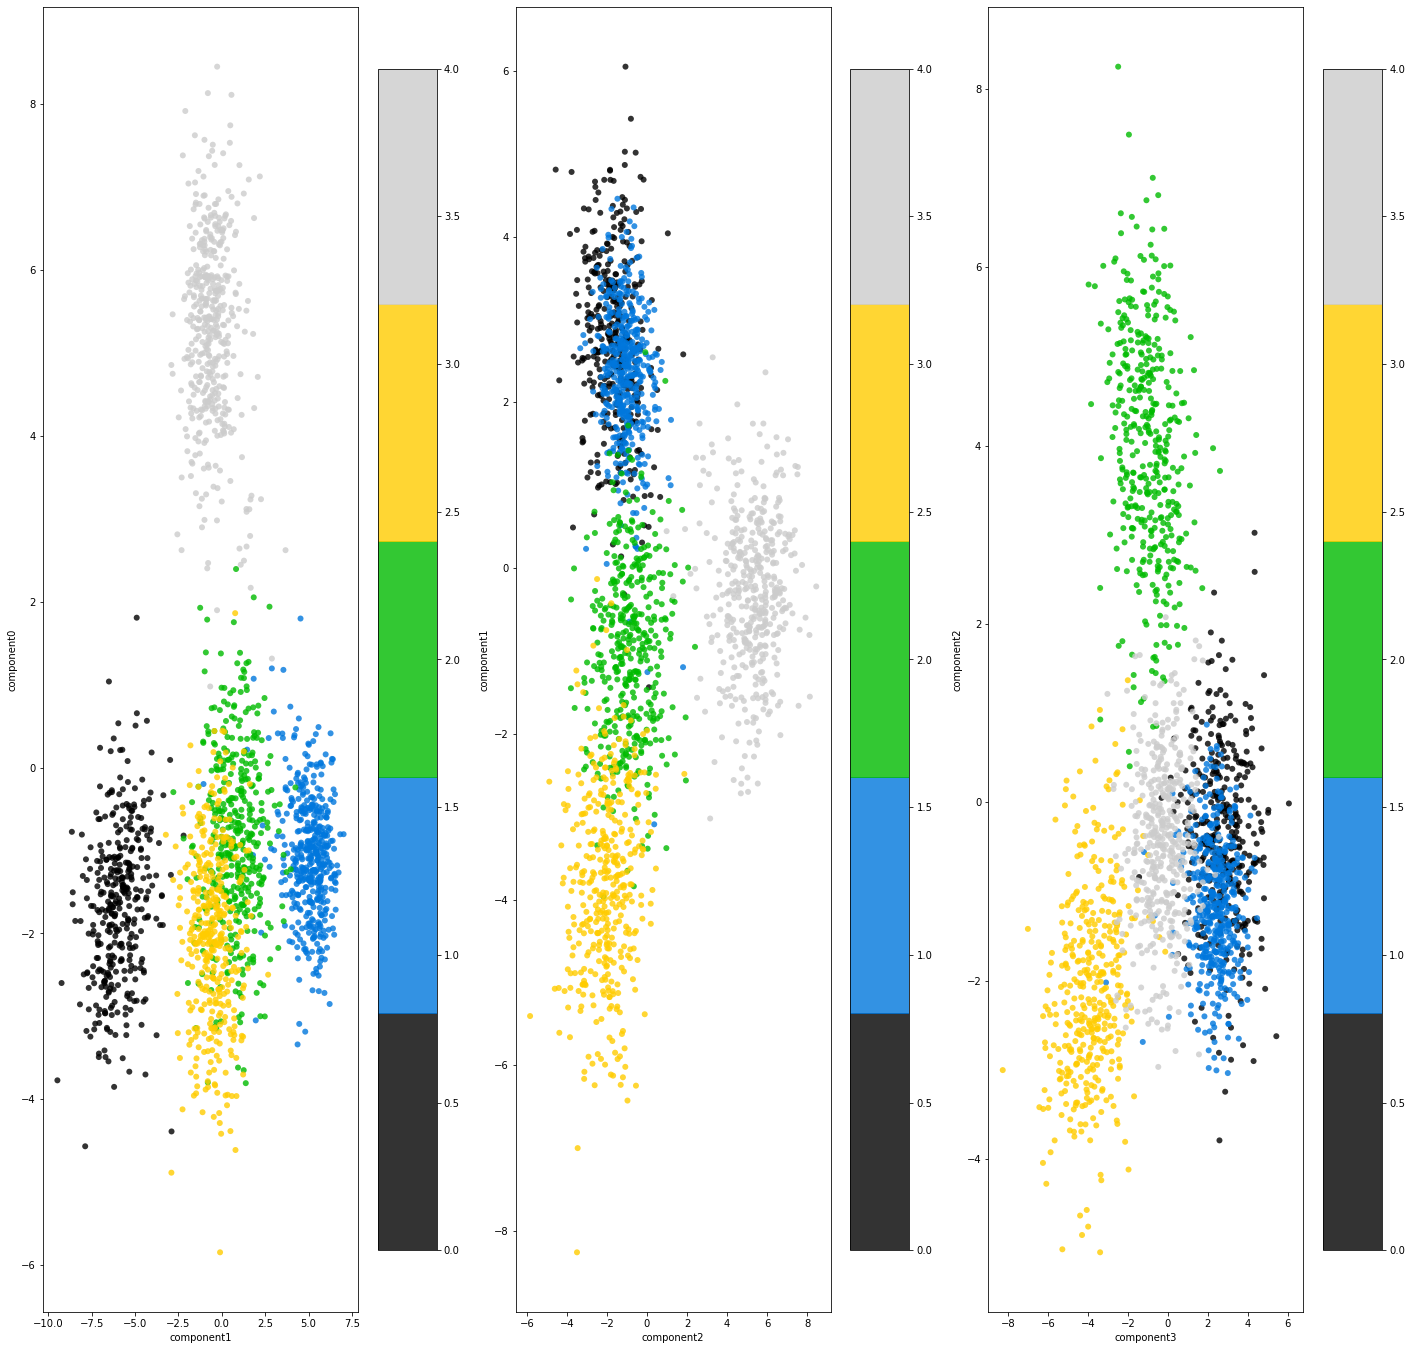

In [45]:
figure, axes = plt.subplots(1, 3,figsize=(24,24))
for k in range(1,4):
    plt.subplot(1, 3, k)
    plt.scatter(lda_4c[:, k-1],lda_4c[:, k],c=np.squeeze(y_train), edgecolor='none', alpha=0.8,cmap=plt.cm.get_cmap('nipy_spectral',5))
    strx=str(k)
    stry=str(k-1)
    plt.xlabel('component'+strx)
    plt.ylabel('component'+stry)
    plt.colorbar()

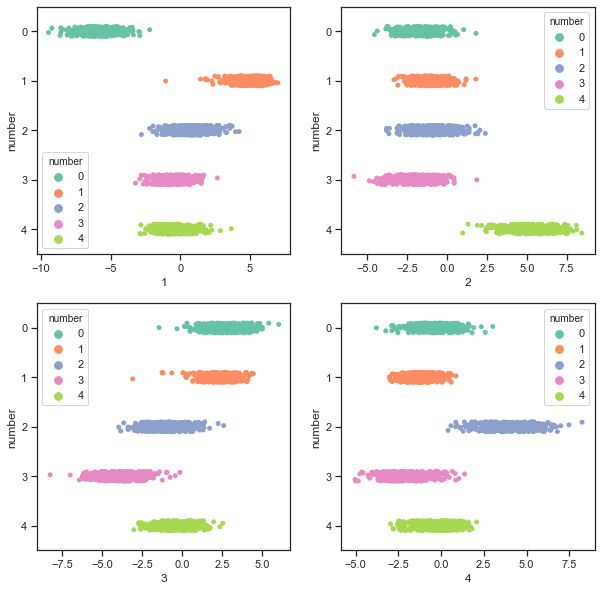

In [46]:
sns.set(style="ticks", color_codes=True)

lda_plot= pd.DataFrame(lda_4c[:,0:4],columns=pd.RangeIndex(start=1, stop=5, step=1))
lda_plot['number'] = y_train
lda_plot['number'] = lda_plot['number'].astype('category',copy=False)
fig, axes =plt.subplots(2,2,figsize=(10,10))

for k in range(1,5): 
    sns.stripplot(x=k, y='number',data=lda_plot, hue='number', palette=sns.color_palette("Set2", 5),ax=axes[(k-1)//2,(k-1)%2]);

## Explain the results obtained in terms of the known classes. Which LDA directions separate which classes better (which LDA directions are responsible for separating which classes)?

Since we have '0', '1', '2', '3', '4' five classes of numbers for the y label, there are 4 components to to classfiy the label of y. Based on the above we have explained variance ratio and the subplots to project the data with the new four eigenvalues, we can know the following information:
The first LDA direction separates '0' class.
The second LDA direction separates '4' class.
The third LDA direction separates '3' class.
The forth LDA direction separates '2' class.

## 2.3.1.2 Compare the results of the LDA with the results obtained by using PCA.

In practical applications, the most commonly used LDA method is Fisher Linear Discriminant. The brief principle is to obtain a linear transformation. The the covariance matrix between data within the same type of data has the largest ratio.

Both PCA and LDA are used to classify the original data after dimensionality reduction. PCA is an unsupervised method. It does not have classification labels. After dimension reduction, unsupervised algorithms such as K-Means or self-organizing mapping networks are used for classification. LDA is a supervised method. It first reduces the dimensionality of the training data and then finds a linear discriminant function.


If you only look at the plots and compare PCA and LDA, We can find well-defined classfication in the data visualization through both methods.But the classification of LDA is a bit clearer.This means LDA classification is more suitable under this dataset.In the PCA plots, the data points has mixed parts, and the five types of numbers overlaps.Although there is slight mixing in the LDA part as well, the overlapped part is less than the PCA. And according to the above three subplots, we can clearly distinguish 0 and 1 in the first one. In the second and the third plots, we can classify 2, 3 and 4 well. Overall, the visual distribution of LDA is obvious.
These plots show that the classifiers trained using these functions may learn to classify various number types reasonably.

## 2.3.2 Compare this with the optimization in PCA. Explain and analyze your comparison. After this analysis, compare your theoretical comparison (this question) and the practical comparison (question 2 in practical questions).


Both Fisher discriminant analysis (FDA) (supervised learning) and PCA analysis (unsupervised learning) can be derived from the viewpoint of LS-SVMs as a constrained optimization problem formulated in the primal space and solved in the dual space of Lagrange multipliers. In FDA the within class scatter is minimized around targets +1 and -1. PCA analysis can be interpreted as maximizing the variance around target 0, i.e., as a one-class target zero modeling problem. 

### For all the rest analysis, please see the hand-writing page.

# Question 3: Nonlinear Dimensionality Reduction
3.1 Dataset
Use dataset B again.

In [47]:
#Loading Data set
data = pd.read_csv("DataB.csv")
data.shape

xset=data.iloc[:,1:785]
yset=data.iloc[:,-1].values
xset

,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,...,fea.775,fea.776,fea.777,fea.778,fea.779,fea.780,fea.781,fea.782,fea.783,fea.784
0,4,4,3,0,0,4,2,1,4,1,...,1,1,3,0,4,2,1,1,4,5
1,5,1,4,3,1,3,5,1,4,4,...,3,1,1,3,3,1,3,3,5,4
2,1,3,0,3,1,1,0,1,0,2,...,4,3,0,2,4,2,2,1,2,4
3,5,3,2,3,5,2,2,0,4,5,...,4,5,4,5,1,4,4,2,4,4
4,3,5,3,3,0,4,1,1,4,3,...,1,1,3,3,3,1,2,4,1,1
5,0,0,1,5,0,5,2,4,3,2,...,2,4,4,5,4,1,1,1,1,1
6,1,3,3,5,3,2,4,4,2,1,...,2,2,2,2,3,5,2,4,0,1
7,3,3,0,5,2,1,2,5,3,0,...,0,2,1,3,2,2,4,2,1,5
8,5,0,3,3,1,3,0,0,2,3,...,1,4,3,0,1,2,3,5,1,2
9,5,5,4,5,3,1,0,0,4,1,...,4,3,1,4,2,0,3,1,4,1


# 3.2 Practical Questions
1. Apply the following methods on the dataset (use the default sklearn parameters except for n components and kernel. Use n components=2 for all because of 2D visualization. For kernel PCA, use RBF kernel.):
• kernel PCA 
• Isomap 
• Locally Linear Embedding (LLE) 
• Laplacian Eigenmap (sklearn.manifold.SpectralEmbedding) 
• t-SNE

In [48]:
# kernel PCA 
from sklearn.decomposition import KernelPCA
start0 = time.process_time()
#RBF kernel
transformer0 = KernelPCA(kernel="rbf",n_components=2)
X_transformed0 = transformer0.fit_transform(xset)
X_transformed0.shape
end0=time.process_time()-start0
end0

1.71875

In [49]:
#Isomap
from sklearn.manifold import Isomap
start1 = time.process_time()
embedding1 = Isomap(n_components=2)
X_transformed1 = embedding1.fit_transform(xset)
X_transformed1.shape
end1=time.process_time()-start1
end1

16.1875

In [50]:
#Locally Linear Embedding (LLE) 
from sklearn.manifold import LocallyLinearEmbedding
start2= time.process_time()
embedding2 = LocallyLinearEmbedding(n_components=2)
X_transformed2 = embedding2.fit_transform(xset)
X_transformed2.shape
end2=time.process_time()-start2
end2

14.953125

In [51]:
#Laplacian Eigenmap 
from sklearn.manifold import SpectralEmbedding
start3= time.process_time()
embedding3 = SpectralEmbedding(n_components=2)
X_transformed3 = embedding3.fit_transform(xset)
X_transformed3.shape
end3=time.process_time()-start3
end3

22.375

In [52]:
# t-SNE
from sklearn.manifold import TSNE
start4= time.process_time()
X_transformed4 = TSNE(n_components=2).fit_transform(xset)
X_transformed4.shape
end4=time.process_time()-start4
end4

75.21875

# 2. Plot the scatter plot of the embeddings. 

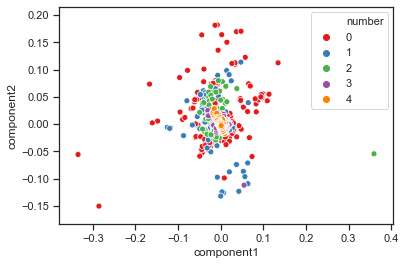

In [53]:
#kernel PCA
X_transformed0_df = pd.DataFrame(X_transformed0,columns=['component1','component2'])
X_transformed0_df['number']=y_train
sns.scatterplot(x='component1', y='component2',data=X_transformed0_df, hue='number',palette=sns.color_palette("Set1", 5))

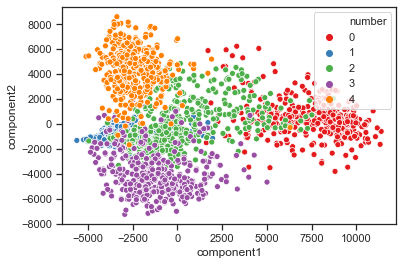

In [54]:
#Isomap
X_transformed1_df = pd.DataFrame(X_transformed1)
X_transformed1_df.columns=['component1','component2']
X_transformed1_df['number']=y_train
sns.scatterplot(x='component1', y='component2',data=X_transformed1_df, hue='number', palette=sns.color_palette("Set1", 5))

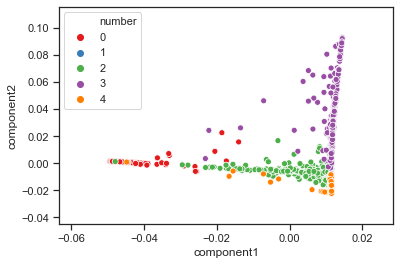

In [55]:
#Locally Linear Embedding (LLE)

X_transformed2_df = pd.DataFrame(X_transformed2,columns=['component1','component2'])
X_transformed2_df['number']=y_train
sns.scatterplot(x='component1', y='component2',data=X_transformed2_df, hue='number',palette=sns.color_palette("Set1", 5))

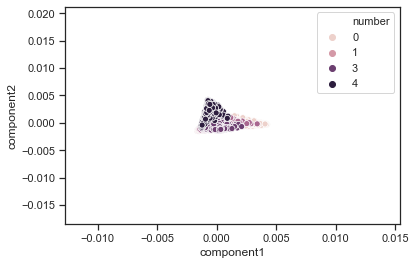

In [56]:
#Laplacian Eigenmap
X_transformed3_df = pd.DataFrame(X_transformed3,columns=['component1','component2'])
X_transformed3_df['number']=y_train
sns.scatterplot(x='component1', y='component2',data=X_transformed3_df, hue='number')

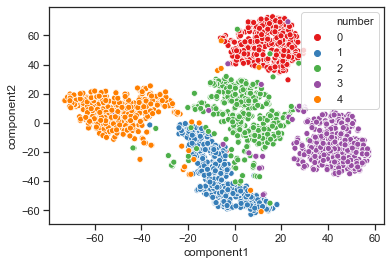

In [57]:
# t-SNE
X_transformed4_df = pd.DataFrame(X_transformed4,columns=['component1','component2'])
X_transformed4_df['number']=y_train
sns.scatterplot(x='component1', y='component2',data=X_transformed4_df, hue='number',palette=sns.color_palette("Set1", 5))

## Compare the embeddings of the diﬀerent above methods. Completely analyze your comparisons including questions suchg as : Which methods do better on which parts of the data? Give at least three clear performance diﬀerences between a pair of methods that you can explain based on the nature of methods and the data. What tradeoﬀs might need to be considered in order to decide which method is ’best’ to use for this dataset?


**kernel PCA**<br>
The kernel PCA is the most commonly used dimensionality reduction method. Its goal is to find the orthogonal basis of the intrinsic low-dimensional subspace of the data. (That is to say, all samples are properly expressed using a hyperplane.) Therefore, its hyperplane should have the following two properties:
1. Maximum separability: The projections of the samples on this hyperplane are separated as much as possible.
2. Nearest reconstruction: The distance between the sample point and this hyperplane is close enough.
It can be seen from the figure above that the dimension reduction dimension is set to 2 and  the time of computation is very short.

**Manifold learning**<br>
Manifold learning is a type of dimensionality reduction method that refers the concept of topological flow.
The basic starting point of Isomap is that after the low-dimensional manifold is embedded in the high-dimensional space, calculating the straight-line distance in the high-level space is misleading because it is unreachable in the low-dimensional manifold.
Therefore, the manifold is localized with Euclidean space in each part, and the neighbor points are found based on the Euclidean space for each point, and the neighbor connection graph is established. The neighbor points are connected, and the non-neighbor points are not connected. The manifold map between the two points is calculated. The problem of the ground line becomes the shortest path problem of the neighbor connection graph. Isomap needs to specify the number of neighbor points or the distance threshold. If the specified range is large, the “short circuit” problem between manifolds may occur. If the range is too small, Some areas in the picture may not be connected to other areas, and the problem of "open circuit" occurs. Both can be misleading for later shortest calculations.

**Isomap**<br>
Isomap can establish a dimensionality reduction mapping relationship locally, and then try to generalize the local mapping to the global. When the dimension is reduced to two or three dimensions, the data can be visualized. The main advantage of isomap is to use "geodesic distance" instead of the original Euclidean distance. This can better control the loss of data information and can more comprehensively integrate the data in high-dimensional space in low-dimensional space Show it.

Here, the dimension of the reduced dimension is set to 2, the number of adjacent points is set to 5, and 2066 pieces of data are used. Isomap takes a long time.

**LLE**<br>
The core idea of LLE is: the part of the manifold (a small neighborhood space) is approximately linear. Therefore, the LLE algorithm believes that each data point can be constructed by a linear weighted combination of its neighbors. That is to say, the error of the data obtained by the linear weighted combination construction of this data and its neighbors is the smallest. In comparison, the two-dimensional shape in the figure is different from that obtained by other embedding methods. The separation effect on some numbers is better, such as 4, but the effect on other numbers is average. LLE does not need to calculate the distance matrix, it only needs to calculate the sparse matrix, which greatly reduces the amount of calculation. Because it is a local optimization algorithm that only considers close points, this kind of maintenance of local properties can be successfully applied on non-convex manifolds, so it is widely used. But this kind of maintenance of local properties is useful for sparse data sets, the neighboring areas may not lie on a plane. The study of dimensionality reduction algorithms based on locally linear embeddings results in a large error formed by the error function, which affects the dimensionality reduction effect. The correlation between data sets is weak, and the overlap of local information is impossible that reflect the overall global structure.


**Laplacian Eigenmaps**<br>
Laplacian Eigenmaps has the similar view to LLE, it also uses a local perspective to build the relationship between the data. Its intuitive idea is make the data points which are related to each other (connected points in the figure) be as close as possible in the space after dimensionality reduction. Laplacian Eigenmaps can reflect the inherent manifold structure of the data.

**t-SNE**<br>
The t-SNE is a non-linear technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. Its main idea is to use the conditional probability to represent the distance of high-dimensional distribution points. Meanwhile, the points of a low-dimensional distribution are also represented in this way. As long as the conditional probability of the two is very close (trained with relative entropy, so label is required), it means that the points of the high-dimensional distribution have been mapped to the low-dimensional distribution. The limitation of this method is that high-dimensional points with shorter distances are more convenient to gather together, but high-dimensional points with longer distances are more difficult to pull away at lower dimensions. In addition, it takes longer to train.

**Isomap and Locally Linear Embedding**<br>
Compared with ISOMAP and LLE, if we want to maintain the global structure information of the data, we can use ISOMAP. ISOMAP keeps the geodesic distance relationship between any pair of points in high-dimensional space unchanged in low-dimensional space; LLE is to maintain local structural information better. LLE firstly considers local neighborhood information. The overlap of local information can provide global information. According to the time of computation, the running time of LLE is shorter, and ISOMAP needs more time to complete the embedding.

**PCA and t-SNE**<br>
PCA and t-SNE are both dimension reduction tools. The main difference is that the mechanism and principle are different. Due to different principles, the attribute information retained by t-sne is more representative, that is, it can reflect the differences between samples best. T-SNE runs  slowly, and PCA is relatively fast. Therefore, t-SNE only can be generally used to display (visualize) high-dimensional data. Due to the slow speed, it is often used to reduce the dimensionality with PCA before using tsne.


The 'best' method to use for the dataset have to be decided based on the situation. computational time, size of the data set, topology of the embedded manifold, noise vs signal, sparseness vs curvature, scale of interest, etc.